In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [4]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).

base_url = "http://api.openweathermap.org/data/2.5/weather?"
query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city

#list and record checker
record = 0
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
windspeed = []


#append lists for reach city found and print found status
for city in cities:
    record += 1
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query)
    city_json = response.json()
    if (str(response) == '<Response [200]>'):
        print(f'Processing Record {record}: {city}')
        city_name.append(city_json['name'])
        cloudiness.append(city_json['clouds']['all'])
        country.append(city_json['sys']['country'])
        date.append(city_json['dt'])
        humidity.append(city_json['main']['humidity'])
        lat.append(city_json['coord']['lat'])
        lng.append(city_json['coord']['lon'])
        max_temp.append(city_json['main']['temp_max'])
        windspeed.append(city_json['wind']['speed'])
    else:
        print('City not found. Skipping...')
#     # this if statement will limit the amount of cities checked, use to avoid running all 500+ cities
#     if record >= 100:
#         break
    # sleep timer to prevent bandwidth maxing for API
    time.sleep(1)

    
#Turn appended lists into dictionary
weather_dict = {'City':city_name,
                'Cloudiness':cloudiness,
                'Country':country,
                'Date':date,
                'Humidity':humidity,
                'Lat':lat,
                'Lng':lng,
                'Max Temp':max_temp,
                'Wind Speed':windspeed}

#Turn dictionary into dataframe
weather_df = pd.DataFrame(weather_dict)

Processing Record 1: hobart
Processing Record 2: hay river
Processing Record 3: rikitea
Processing Record 4: carutapera
Processing Record 5: soyo
Processing Record 6: ushuaia
Processing Record 7: bandarbeyla
Processing Record 8: newport
Processing Record 9: asosa
Processing Record 10: busselton
Processing Record 11: butaritari
Processing Record 12: port elizabeth
Processing Record 13: yangambi
Processing Record 14: bredasdorp
Processing Record 15: mataura
Processing Record 16: salalah
Processing Record 17: new norfolk
Processing Record 18: thinadhoo
Processing Record 19: mitsamiouli
Processing Record 20: punta arenas
Processing Record 21: tasiilaq
Processing Record 22: port-cartier
Processing Record 23: biscarrosse
Processing Record 24: avarua
Processing Record 25: berlevag
Processing Record 26: angoche
Processing Record 27: east london
Processing Record 28: carnarvon
Processing Record 29: lasa
Processing Record 30: kapaa
Processing Record 31: pechenga
Processing Record 32: jieshi
Proc

Processing Record 260: shu
Processing Record 261: buritizeiro
Processing Record 262: dhidhdhoo
City not found. Skipping...
Processing Record 264: channel-port aux basques
Processing Record 265: avera
Processing Record 266: puerto escondido
Processing Record 267: norman wells
Processing Record 268: sao miguel do araguaia
Processing Record 269: ovre ardal
Processing Record 270: colares
Processing Record 271: kamaishi
Processing Record 272: qiqihar
Processing Record 273: san cristobal
Processing Record 274: balabac
Processing Record 275: willowmore
Processing Record 276: iqaluit
Processing Record 277: nacozari
Processing Record 278: bournemouth
Processing Record 279: mykhaylivka
Processing Record 280: pangkalanbuun
City not found. Skipping...
Processing Record 282: zhigansk
Processing Record 283: xinyu
Processing Record 284: tottori
Processing Record 285: den helder
Processing Record 286: ha tinh
Processing Record 287: sao filipe
Processing Record 288: tonantins
Processing Record 289: kie

Processing Record 517: ust-maya
Processing Record 518: kalghatgi
Processing Record 519: teguldet
Processing Record 520: mokhsogollokh
Processing Record 521: kharan
Processing Record 522: kaputa
Processing Record 523: santa barbara
Processing Record 524: frutal
Processing Record 525: buraydah
City not found. Skipping...
Processing Record 527: vidim
Processing Record 528: swellendam
Processing Record 529: port blair
Processing Record 530: da lat
Processing Record 531: maharajganj
Processing Record 532: labuhan
Processing Record 533: xining
Processing Record 534: zemio
Processing Record 535: kysyl-syr
Processing Record 536: tayoltita
Processing Record 537: pilar
Processing Record 538: bayir
Processing Record 539: college
Processing Record 540: kyzyl-suu
Processing Record 541: santa catarina de tepehuanes
Processing Record 542: arak
Processing Record 543: helong
Processing Record 544: usinsk
Processing Record 545: banjar
Processing Record 546: barretos
Processing Record 547: buala
Processi

In [5]:
# export dataframe to csv
export_csv = weather_df.to_csv (output_data_file, index = None, header=True)
# counts for Dataframe
weather_df.count()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [6]:
# display Dataframe head
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hobart,100,AU,1569513989,71,-42.88,147.33,53.01,10.29
1,Hay River,75,CA,1569513990,66,60.82,-115.79,32.00,11.21
2,Rikitea,41,PF,1569513992,73,-23.12,-134.97,71.23,10.18
3,Carutapera,86,BR,1569513993,64,-1.20,-46.02,85.99,9.04
4,Soyo,40,AO,1569513994,78,-6.13,12.37,80.60,10.29
5,Ushuaia,75,AR,1569513995,92,-54.81,-68.31,50.00,13.87
6,Bandarbeyla,86,SO,1569513997,65,9.49,50.81,81.13,21.94
7,Newport,20,GB,1569513729,67,51.59,-3.00,64.99,18.34
8,Asosa,41,ET,1569513999,93,10.07,34.53,70.69,3.58
9,Busselton,0,AU,1569514000,55,-33.64,115.35,57.00,14.65


## Data Scatterplots

#### Latitude vs. Temperature Plot

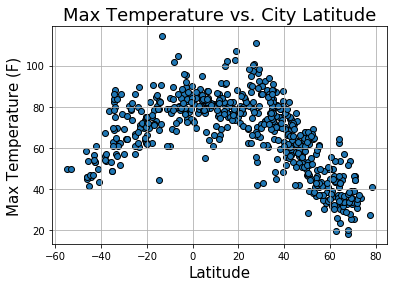

In [7]:
lat_temp_plot = plt.scatter(weather_df['Lat'],weather_df['Max Temp'],marker='o',edgecolors='black')
plt.grid()
plt.title('Max Temperature vs. City Latitude',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.savefig('output_data/Fig1.png')
plt.show()

This plot shows the relationship between latittude and temperature in the selected cities. 

A trend is shown where the closer a city is to the equator, the higher the max temperature. As you move away from the equator, the max temperature gradually decreases with cities above the equator showing a marginally larger decreases.

#### Latitude vs. Humidity Plot

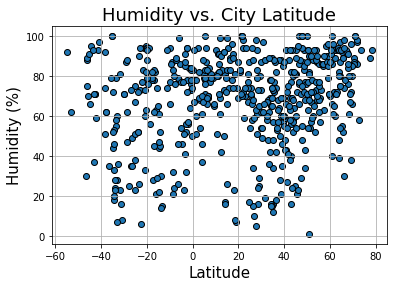

In [8]:
lat_hum_plot = plt.scatter(weather_df['Lat'],weather_df['Humidity'],marker='o',edgecolors='black')
plt.grid()
plt.title('Humidity vs. City Latitude',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.savefig('output_data/Fig2.png')
plt.show()

This plot shows the relationship between latittude and humidity in the selected cities. 

Locations south of the equator seem to have a higher average humidity, while it is more varied above the equator.

#### Latitude vs. Cloudiness Plot

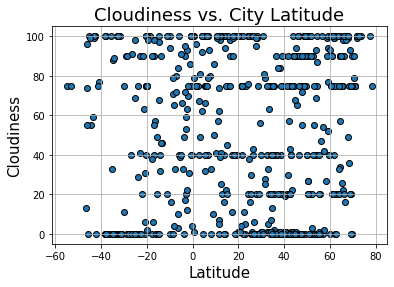

In [9]:
lat_cloud_plot = plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],marker='o',edgecolors='black')
plt.grid()
plt.title('Cloudiness vs. City Latitude',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness',size=15)
plt.savefig('output_data/Fig3.png')
plt.show()

This plot shows the relationship between latittude and cloudiness in the selected cities. 

Latitude does not seem to greatly affect cloudiness.

#### Latitude vs. Wind Speed Plot

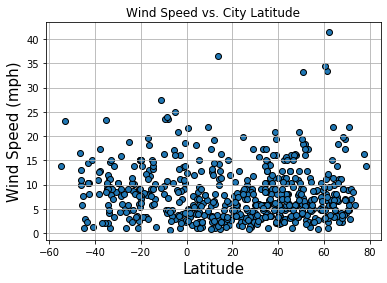

In [10]:
lat_ws_plot = plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],marker='o',edgecolors='black')
plt.grid()
plt.title('Wind Speed vs. City Latitude')
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.savefig('output_data/Fig4.png')
plt.show()

This plot shows the relationship between latittude and wind speed in the selected cities. 

As shown, as you move farther from the equator (latittude = 0) there is an small net increase in wind speed. 

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere (Lat > 0)
weather_df_north = weather_df[weather_df['Lat'] >= 0]

#Southern Hemisphere (Lat < 0)
weather_df_south = weather_df[weather_df['Lat'] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

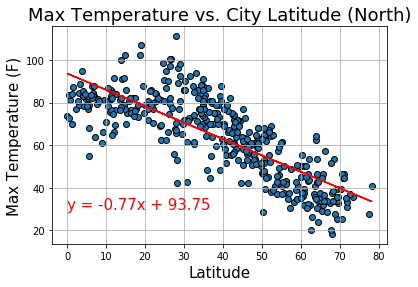

The r squared is: -0.7981250609385412


In [12]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

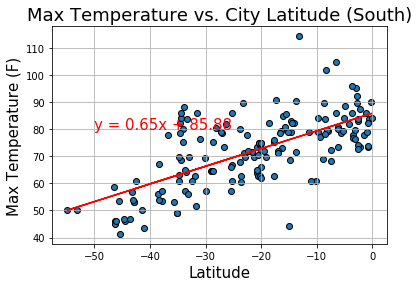

The r squared is: 0.6767032685245212


In [13]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,80),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

### Max Temp vs. Latitutde Linear Regression Comparison
* Both the northern and southern hemispheres have a net drop in temperature as you move away from the equator (latititude = 0).
* The slope of the graph isnt horizontal which indicates a clear net change in temperature as you move from the Equator.
* The linear regression lines shows a steeper slope for the northern hemisphere which indicates that there is a steeper drop in temperature in the North as you move further from the Equator.

Note: All the following slopes listed within Regression Comparisons will be normalized for direction away from the equator. Positive slope will indicate a net increase moving away from the equator, while negative slope will indicate a net decrease as you move away from the equator.

####  Northern Hemisphere - Latitude Linear Regression vs. Humidity (%)

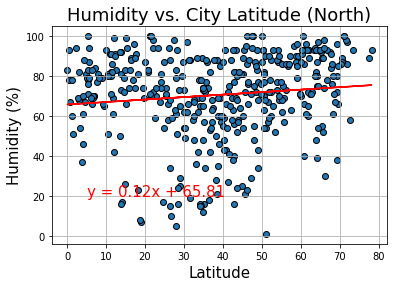

The r squared is: 0.11530871956367049


In [14]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Latitude Linear Regression vs. Humidity (%)


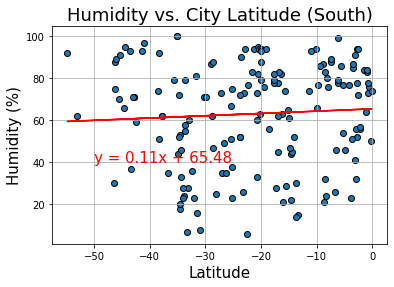

The r squared is: 0.06059662266234155


In [15]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,40),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

# Humidity vs. Latitutde Linear Regression Comparison
* Both hemispheres show very slight changes in Humidity as you move away from the equator (latititude = 0).
* As you move further North, the humidity increases very slightly (slope = 0.22)
* As you move further South, the humidity decreases very slightly (slope = -0.11)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

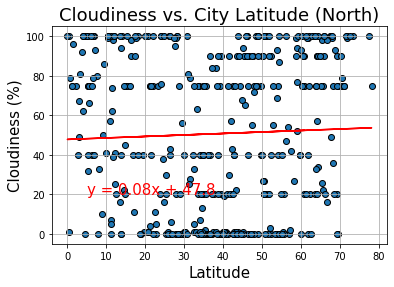

The r squared is: 0.038394475018053695


In [16]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

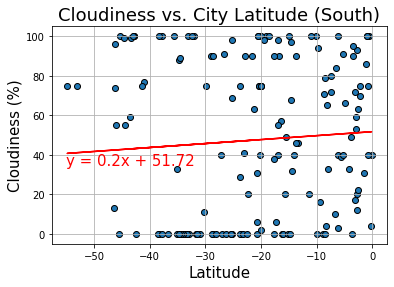

The r squared is: 0.06987794029986001


In [17]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-55,35),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

### Cloudiness vs. Latitutde Linear Regression Comparison
* Both hemispheres show a very small change in cloudiness as  you move away from the equator (latititude = 0).
* As you move further North, there is a slight net increase in cloudiness (slope = 0.08).
* However, as you move further South there is a slight net decrease in cloudiness (slope = -0.2).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


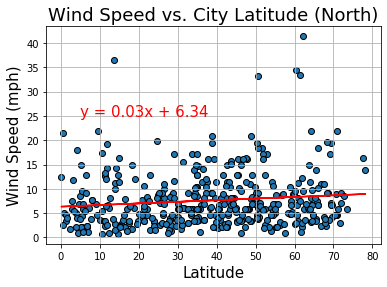

The r squared is: 0.11686218326972642


In [18]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(5,25),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

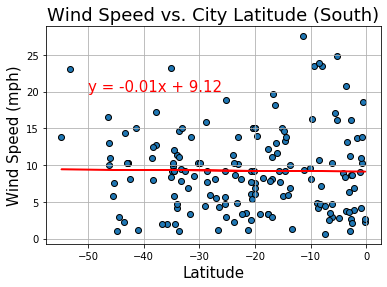

The r squared is: -0.01338129660329983


In [19]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,20),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

### Wind Speed (mph) vs. Latitutde Linear Regression Comparison
* The graphs show a net increase in windspeed as you move away from the equator.
* The slopes show that the change in wind speed is more gradual.
* However, because of how gradual the change in windspeed is, we can label it as stastically insignificant and assume that wind speed is relatively stable regardless of proximity to the equator.